<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/Classification%20advanced%20using%20cancer%20cell%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('sample_data/cancer_classification.csv')

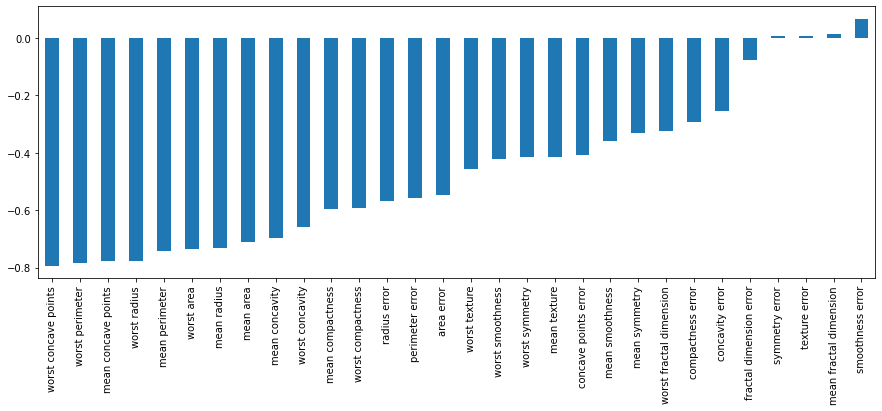

In [5]:
plt.figure(figsize=(15,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

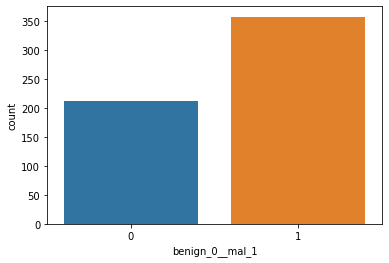

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

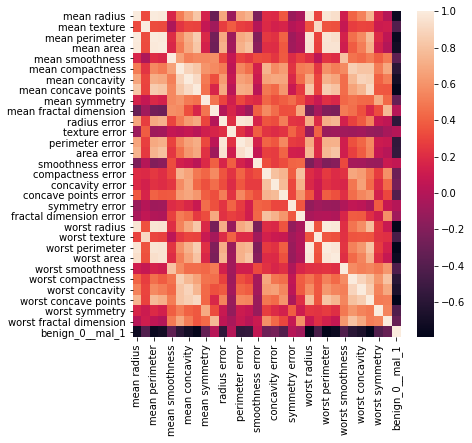

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr())

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
X_train.shape

(426, 30)

In [16]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#The last layer must have an activation function sigmoid due to this is a binary classification problem
model.add(Dense(1, activation='sigmoid'))

#Here the loss funtion is binary_crossentropy because this is a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600)


Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6922 - val_loss: 0.6827
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6653 - val_loss: 0.6565
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6389 - val_loss: 0.6274
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5991 - val_loss: 0.5754
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5400 - val_loss: 0.5093
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4796 - val_loss: 0.4543
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4317 - val_loss: 0.4066
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3888 - val_loss: 0.3640
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3510 - val_loss: 0.3260
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3182 - val_loss: 0.2942
Epoch 11

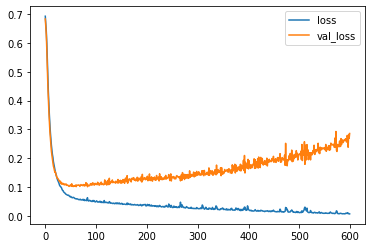

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#The last layer must have an activation function sigmoid due to this is a binary classification problem
model.add(Dense(1, activation='sigmoid'))

#Here the loss funtion is binary_crossentropy because this is a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop],
          epochs=600)

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5797 - val_loss: 0.5633
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5382 - val_loss: 0.5151
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4896 - val_loss: 0.4626
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4406 - val_loss: 0.4125
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3956 - val_loss: 0.3659
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3573 - val_loss: 0.3261
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3242 - val_loss: 0.2952
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2984 - val_loss: 0.2675
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2776 - val_loss: 0.2460
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2568 - val_loss: 0.2282
Epoch 11/

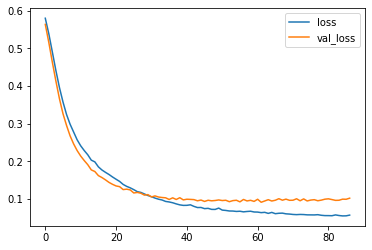

In [29]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # This means half of the neurons will be turned off randomly
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#The last layer must have an activation function sigmoid due to this is a binary classification problem
model.add(Dense(1, activation='sigmoid'))

#Here the loss funtion is binary_crossentropy because this is a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop],
          epochs=600)

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6892 - val_loss: 0.6737
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6813 - val_loss: 0.6575
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6617 - val_loss: 0.6423
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6402 - val_loss: 0.6236
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6345 - val_loss: 0.6006
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5951 - val_loss: 0.5725
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5820 - val_loss: 0.5466
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5534 - val_loss: 0.5221
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5550 - val_loss: 0.4997
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5411 - val_loss: 0.4793
Epoch 11

In [33]:
model_loss = pd.DataFrame(model.history.history)

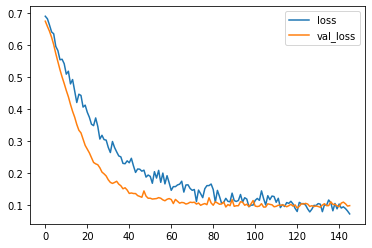

In [34]:
model_loss.plot()

In [36]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [39]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
